Coursework 1 Wind Energy

Importation of data and libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings
pd.options.mode.chained_assignment = None

In [3]:
# import data
data_wind = pd.read_csv('data_wind.csv', sep=';')
data_wind["Day"] = pd.to_datetime(data_wind["Day"], format='%d.%m.%Y',errors='ignore')

Description of the data

In [4]:
data_wind["Anemometer reading [m/s]"].describe()

count    99.000000
mean      6.995960
std       5.002651
min       0.500000
25%       3.200000
50%       6.700000
75%       8.900000
max      20.300000
Name: Anemometer reading [m/s], dtype: float64

Table of distribution of the wind

In [5]:
data_wind["Speed groups"] = pd.cut(data_wind["Anemometer reading [m/s]"], bins=[0.49,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5], labels=["0.5-1.5","1.5-2.5","2.5-3.5","3.5-4.5","4.5-5.5","5.5-6.5","6.5-7.5","7.5-8.5","8.5-9.5","9.5-10.5","10.5-11.5","11.5-12.5","12.5-13.5","13.5-14.5","14.5-15.5","15.5-16.5","16.5-17.5","17.5-18.5","18.5-19.5","19.5-20.5"])
hist_data  = data_wind.groupby(data_wind["Speed groups"]).count()
hist_data["ni"] = hist_data["Anemometer reading [m/s]"]
hist_data.drop(["Anemometer reading [m/s]","Day","Time /hour"], axis=1, inplace=True)
hist_data

,ni
Speed groups,
0.5-1.5,14
1.5-2.5,5
2.5-3.5,9
3.5-4.5,10
4.5-5.5,5
5.5-6.5,6
6.5-7.5,10
7.5-8.5,13
8.5-9.5,4


Plot the histogram

<Axes: xlabel='Anemometer reading [m/s]', ylabel='Count'>

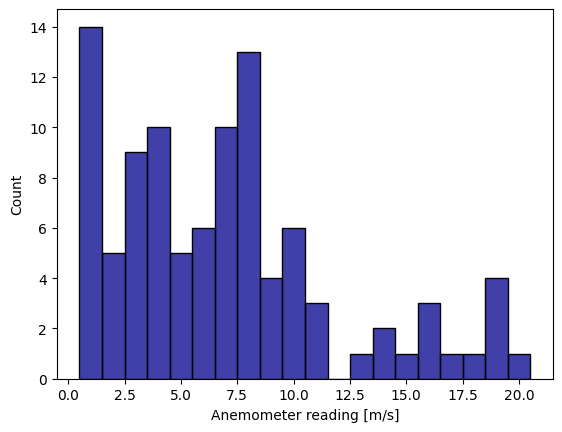

In [6]:
# plot histogram of wind speed
sns.histplot(data_wind["Anemometer reading [m/s]"], color = 'darkblue', bins=[0.5,1.51,2.51,3.51,4.51,5.51,6.51,7.51,8.51,9.51,10.51,11.51,12.51,13.51,14.51,15.51,16.51,17.51,18.51,19.51,20.51])


Table of density of the wind

In [7]:
density_data = hist_data/len(data_wind)
density_data

,ni
Speed groups,
0.5-1.5,0.141414
1.5-2.5,0.050505
2.5-3.5,0.090909
3.5-4.5,0.101010
4.5-5.5,0.050505
5.5-6.5,0.060606
6.5-7.5,0.101010
7.5-8.5,0.131313
8.5-9.5,0.040404


Plot the relative frequency distribution

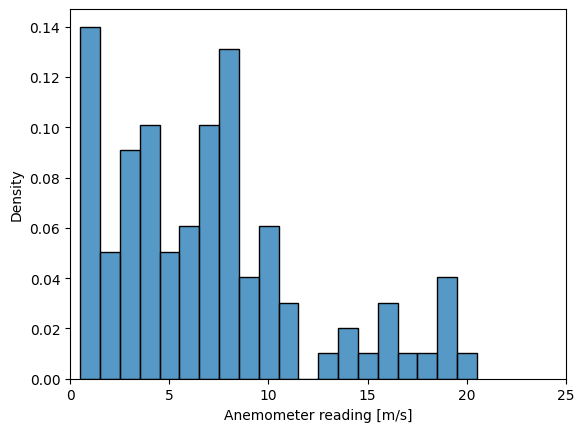

In [8]:
# plot the data
# histogram
sns.histplot(data_wind["Anemometer reading [m/s]"],
             bins=[0.5,1.51,2.51,3.51,4.51,5.51,6.51,7.51,8.51,9.51,10.51,11.51,12.51,13.51,14.51,15.51,16.51,17.51,18.51,19.51,20.51],stat = 'density')
# lim [0,25]
plt.xlim(0,25)
plt.show()


Table of usefull data for analysis

In [9]:
hist_data["Mid class value (Ui)"] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
hist_data.reset_index(inplace=True)
hist_data["niUi"] = hist_data["ni"]*hist_data["Mid class value (Ui)"]
hist_data["niUi^2"] = hist_data["niUi"]*hist_data["Mid class value (Ui)"]
hist_data["Rfi"] = hist_data["ni"]/hist_data["ni"].sum()
hist_data

,Speed groups,ni,Mid class value (Ui),niUi,niUi^2,Rfi
0,0.5-1.5,14,1,14,14,0.141414
1,1.5-2.5,5,2,10,20,0.050505
2,2.5-3.5,9,3,27,81,0.090909
3,3.5-4.5,10,4,40,160,0.101010
4,4.5-5.5,5,5,25,125,0.050505
5,5.5-6.5,6,6,36,216,0.060606
6,6.5-7.5,10,7,70,490,0.101010
7,7.5-8.5,13,8,104,832,0.131313
8,8.5-9.5,4,9,36,324,0.040404
9,9.5-10.5,6,10,60,600,0.060606


Calculation of mean and standard deviation

In [10]:
mean = hist_data["niUi"].sum()/hist_data["ni"].sum()
sigma = np.sqrt((hist_data["niUi^2"].sum()/hist_data["ni"].sum())-mean**2)
print("Mean: ", mean)
print("Standard deviation: ", sigma)

Mean:  6.96969696969697
Standard deviation:  4.9511850340606305


Plot Rayleigh distribution

<Axes: xlabel='Anemometer reading [m/s]', ylabel='Density'>

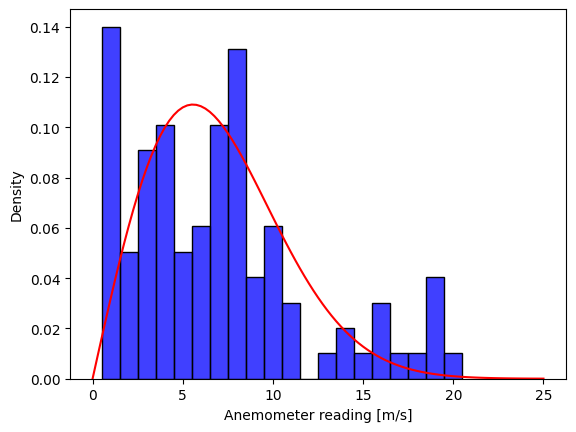

In [11]:
# plot Rayleigh distribution
X = np.linspace(0, 25, 101)
YRayleigh = (np.pi/2)*(X/mean**2)*np.exp(-(np.pi/4)*((X/mean)**2))

plt.plot(X, YRayleigh, color="r", label="Anemometer reading [m/s]")
sns.histplot(data_wind["Anemometer reading [m/s]"],  color="b", label="Anemometer reading [m/s]", bins=[0.5,1.51,2.51,3.51,4.51,5.51,6.51,7.51,8.51,9.51,10.51,11.51,12.51,13.51,14.51,15.51,16.51,17.51,18.51,19.51,20.51], stat="density")


Plot Weibull distribution

k:  1.4356697571347838
c:  7.675983823260405


<Axes: xlabel='Anemometer reading [m/s]', ylabel='Density'>

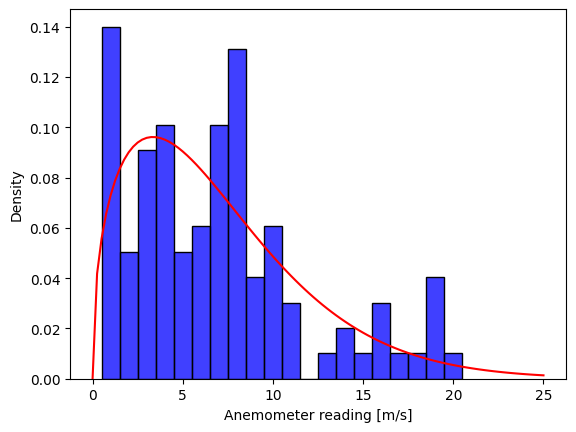

In [12]:
#Weibull distribution
from scipy.special import gamma, factorial
k = (0.9874*mean/sigma)**(1.0983)
x = 1 + 1/k
c = mean/gamma(x)
X = np.linspace(0, 25, 101)
Yweibull = k/c*((X/c)**(k-1))*np.exp(-((X/c)**k))
print("k: ", k)
print("c: ", c)
plt.plot(X, Yweibull, color='r', label='Weibull distribution')
sns.histplot(data_wind["Anemometer reading [m/s]"],  color="b", label="Anemometer reading [m/s]", bins= [0.5,1.51,2.51,3.51,4.51,5.51,6.51,7.51,8.51,9.51,10.51,11.51,12.51,13.51,14.51,15.51,16.51,17.51,18.51,19.51,20.51],stat="density")

Conparison of the two models

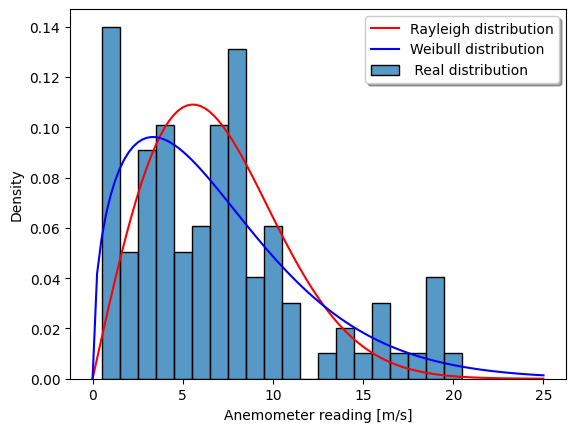

In [13]:
# plot rayleigh and weibull distribution
plt.plot(X, YRayleigh, color="r", label="Rayleigh distribution")
plt.plot(X, Yweibull, color='b', label='Weibull distribution')
sns.histplot(data_wind["Anemometer reading [m/s]"],  label=" Real distribution", bins=[0.5,1.51,2.51,3.51,4.51,5.51,6.51,7.51,8.51,9.51,10.51,11.51,12.51,13.51,14.51,15.51,16.51,17.51,18.51,19.51,20.51],stat="density")
legend = plt.legend(loc='upper right', shadow=True)



In [14]:
# accuracy of the fit
# Calculate of the distance between the real distribution and the fitted distribution
sumweibull = 0
sumrayleigh = 0
for i in range(1, 21):
    sumweibull += abs(hist_data["Rfi"][i-1] - Yweibull[4*i])
    sumrayleigh += abs(hist_data["Rfi"][i-1] - YRayleigh[4*i])
print("sumweibull: ", sumweibull)
print("sumrayleigh: ", sumrayleigh)

sumweibull:  0.4309580048430389
sumrayleigh:  0.47636671877604264


Kinetic energy

In [15]:
Umaxrayleigh = np.sqrt(8/np.pi)*mean
Umaxweibull = ((1+2/k)**(1/k))*c
PRayleigh = Umaxrayleigh**3/2
PWeiBull = Umaxweibull**3/2
print("Umaxrayleigh: ", Umaxrayleigh, "PowerRayleigh/rhoV: ", PRayleigh)
print("Umaxweibull: ", Umaxweibull, "PowerWeiBull/rhoV: ", PWeiBull)

Umaxrayleigh:  11.122027211191456 PowerRayleigh/rhoV:  687.8945429273762
Umaxweibull:  14.095883095230496 PowerWeiBull/rhoV:  1400.383135678612


Weibull Power distribution

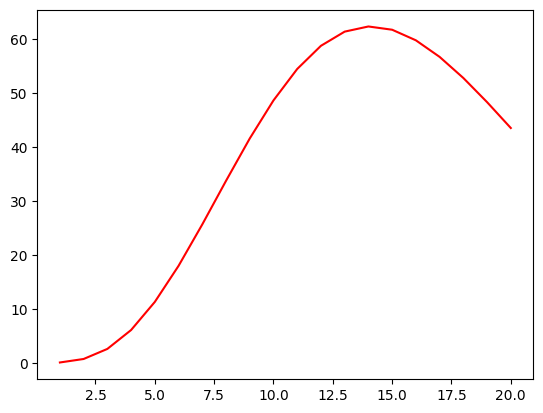

In [16]:
X2 = np.linspace(1, 20, 20)
Y2weibull = k/c*((X2/c)**(k-1))*np.exp(-((X2/c)**k))
hist_data["weibull"] = Y2weibull*hist_data["Mid class value (Ui)"]**3
plt.plot(hist_data["Mid class value (Ui)"], hist_data["weibull"], color="r", label="Weibull Power law distribution")

Rayleigh Power distribution

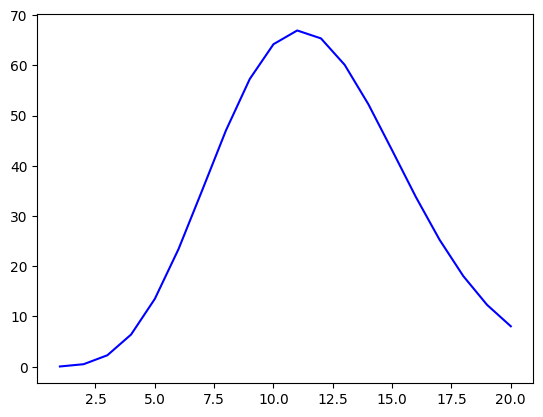

In [17]:
Y2Rayleigh = (np.pi/2)*(X2/mean**2)*np.exp(-(np.pi/4)*((X2/mean)**2))
hist_data["Rayleigh"] = Y2Rayleigh*hist_data["Mid class value (Ui)"]**3
plt.plot(hist_data["Mid class value (Ui)"], hist_data["Rayleigh"], color="b", label="Rayleigh power law distribution")

Power distribution

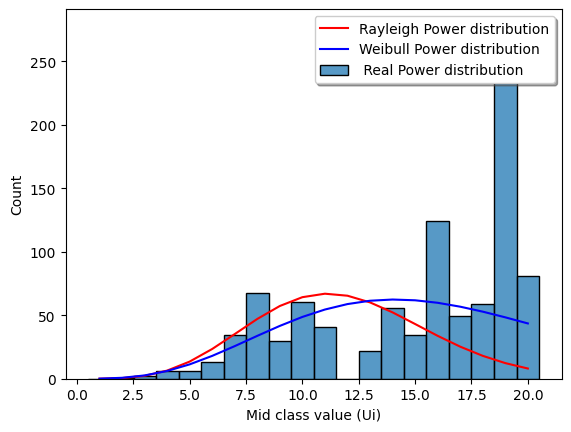

In [18]:
hist_data["Power law"] = hist_data["Rfi"]*hist_data["Mid class value (Ui)"]**3
plt.plot(X2, hist_data["Rayleigh"], color="r", label="Rayleigh Power distribution")
plt.plot(X2, hist_data["weibull"], color='b', label='Weibull Power distribution')
sns.histplot(x =hist_data["Mid class value (Ui)"],  label=" Real Power distribution", bins=[0.5,1.51,2.51,3.51,4.51,5.51,6.51,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5],weights=hist_data["Power law"])
legend = plt.legend(loc='upper right', shadow=True)

Variation of wind speed

In [19]:
variation = sigma/mean
print("variation: ", variation)

variation:  0.7103874179304382


Average Power

In [20]:
Ptot = sum(hist_data["Power law"])
Ptotrayleigh = sum(hist_data["Rayleigh"])
Ptotweibull = sum(hist_data["weibull"])
print("Ptot: ", Ptot)
print("Ptotrayleigh: ", Ptotrayleigh)
print("Ptotweibull: ", Ptotweibull)
PtotcalRayleigh =  6/np.pi * (mean**3)
print("Ptotcalweibull: ", PtotcalRayleigh)

Ptot:  963.4545454545454
Ptotrayleigh:  634.8122705156294
Ptotweibull:  748.3001047000968
Ptotcalweibull:  646.6109667247986


Gross Wind Energy (AAE)

In [21]:
Etot = Ptot *8420
Etotrayleigh = Ptotrayleigh *8420
Etotweibull = Ptotweibull *8420
EtotcalRayleigh = PtotcalRayleigh *8420
print("Etot: ", Etot)
print("Etotrayleigh: ", Etotrayleigh)
print("Etotweibull: ", Etotweibull)
print("EtotcalRayleigh: ", EtotcalRayleigh)

Etot:  8112287.2727272725
Etotrayleigh:  5345119.3177416
Etotweibull:  6300686.881574815
EtotcalRayleigh:  5444464.339822804


Coursework 2

Initialisation of values

In [33]:
Cl= 0.97
alpha = 10
B = 4 
rho = 1.225
P = 334*10**6
Cp = 16/27
eta = 0.85


Rotor diameter

In [34]:
D = np.sqrt((4*P)/(Etotrayleigh * eta *Cp* rho * np.pi))
print("D: ", D)

D:  11.355178723005903


Lambda

In [37]:
x= np.linspace(0.1, 1, 10)
R = D/2
Omega = 55 * (np.pi/30)
lambda1 = Omega * R / mean
print("lambda: ", lambda1)
lambdar = lambda1 * x

lambda:  4.691820513938838


Angle of relative wind

Text(0, 0.5, 'Angle of relative wind (deg)')

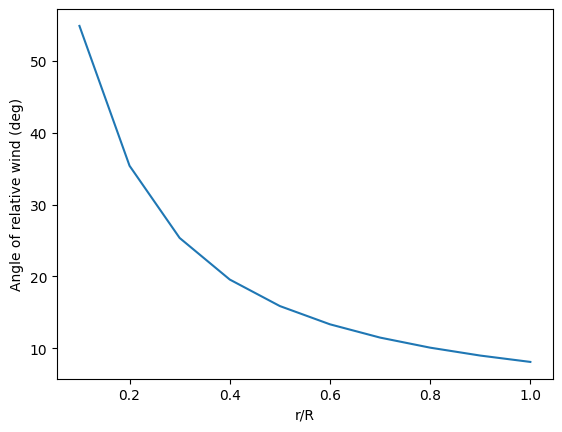

In [41]:
phi = np.arctan(2/(3*lambdar))
phideg = phi*180/np.pi
sns.lineplot(x=x, y=phideg)
plt.xlabel("r/R")
plt.ylabel("Angle of relative wind (deg)")

Chord

Text(0, 0.5, 'Chord length (m)')

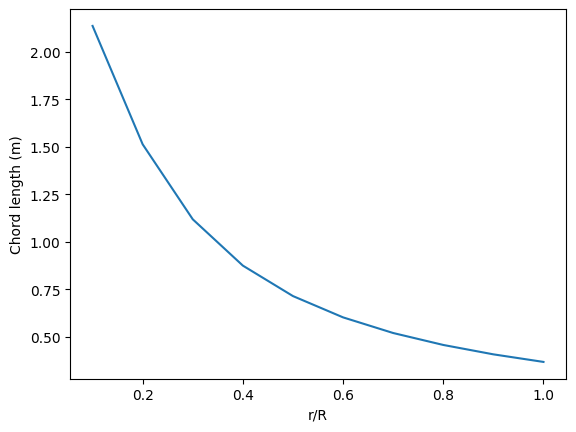

In [42]:
c = (8*np.pi*np.sin(phi)*R)/(3*lambda1*B*Cl)
sns.lineplot(x=x, y=c)
plt.xlabel("r/R")
plt.ylabel("Chord length (m)")

Section pitch angle

Text(0, 0.5, 'Section pitch angle (deg)')

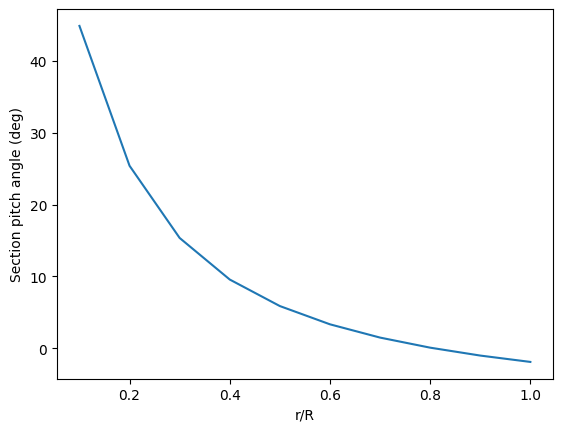

In [43]:
thetapdeg = phideg - alpha
sns.lineplot(x=x, y=thetapdeg)
plt.xlabel("r/R")
plt.ylabel("Section pitch angle (deg)")

Section twist angle

thetapdegzero:  -1.9129067291180029


Text(0, 0.5, 'Section twist angle(deg)')

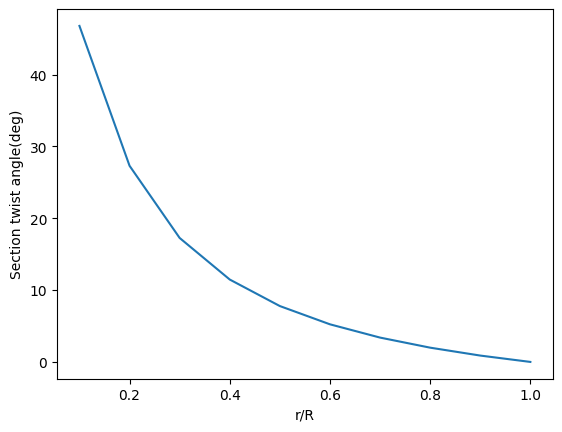

In [44]:
thetapdegzero = thetapdeg[9]
print("thetapdegzero: ", thetapdegzero)
thetaTdeg = thetapdeg - thetapdegzero
sns.lineplot(x=x, y=thetaTdeg)
plt.xlabel("r/R")
plt.ylabel("Section twist angle(deg)")